# Neuronales Netz (28x28)

## One-Hot-Label

In [2]:
import numpy as np
from numpy import load
from scipy.special import expit
from sklearn.preprocessing import OneHotEncoder
import pickle
import matplotlib.pyplot as plt

In [3]:
# load numpy array from npy file

# load array

X_train=load('../01_Dataset/dataset_28x28/X_train.npy').astype(np.float32) * 1.0/255.0 # normalisieren
y_train=load('../01_Dataset/dataset_28x28/y_train.npy')
X_test=load('../01_Dataset/dataset_28x28/X_test.npy').astype(np.float32) * 1.0/255.0  # normalisieren
y_test=load('../01_Dataset/dataset_28x28/y_test.npy')

print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))


oh = OneHotEncoder()
y_train_oh = oh.fit_transform(y_train.reshape(-1, 1)).toarray()

(6344, 28, 28, 1)
6344
(2720, 28, 28, 1)
2720


In [4]:
print(X_train.shape)
print(X_test.shape)

(6344, 28, 28, 1)
(2720, 28, 28, 1)


0
[1. 0. 0. 0. 0.]


<function matplotlib.pyplot.show(close=None, block=None)>

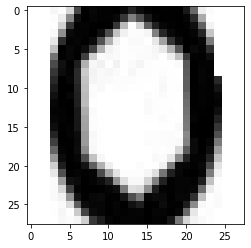

In [6]:
# label check
i=7
print(y_train[i])
print(y_train_oh[i])
plt.imshow(X_train[i],cmap='gray')
plt.show
# 0: innensechskant
# 1: philips
# 2: pozidriv
# 3: sechskant
# 4: torx

In [7]:
X_train = X_train.astype(np.float32).reshape(-1, 784)#reshape hier wegen label test
X_test  = X_test.astype(np.float32).reshape(-1, 784)#
print(X_train)
print(X_test.shape)
y_test = y_test.astype(np.int)
print(y_test)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(2720, 784)
[2 4 2 ... 4 1 0]


C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [8]:
class NeuralNetwork(object):
    def __init__(self, lr = 0.01):
        self.lr = lr

        self.w0 = np.random.randn(100, 784)
        self.w1 = np.random.randn(5, 100)


    def activation(self, x):
        return expit(x)

    def train(self, X, y):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)

        e1 = y.T - pred
        e0 = e1.T @ self.w1

        dw1 = e1 * pred * (1 - pred) @ a0.T / len(X)
        dw0 = e0.T * a0 * (1 - a0) @ X / len(X)

        assert dw1.shape == self.w1.shape
        assert dw0.shape == self.w0.shape

        self.w1 = self.w1 + self.lr * dw1
        self.w0 = self.w0 + self.lr * dw0

        # print("Kosten: " + str(self.cost(pred, y)))

    def predict(self, X):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)
        return pred

    def cost(self, pred, y):
        # SUM((y - pred)^2)
        s = (1 / 2) * (y.T - pred) ** 2
        return np.mean(np.sum(s, axis=0))

model = NeuralNetwork()

for i in range(0, 500):
    for j in range(0, len(X_train), 100):
        model.train(X_train[j:(j + 100), :] / 255., y_train_oh[j:(j + 100), :])

    y_test_pred = model.predict(X_test / 255.)
    y_test_pred = np.argmax(y_test_pred, axis=0)
    print(np.mean(y_test_pred == y_test))

0.20808823529411766
0.20808823529411766
0.20808823529411766
0.20808823529411766
0.20808823529411766
0.20808823529411766
0.20808823529411766
0.20808823529411766
0.20808823529411766
0.21433823529411763
0.26544117647058824
0.30220588235294116
0.30220588235294116
0.3058823529411765
0.31176470588235294
0.3161764705882353
0.3191176470588235
0.3235294117647059
0.32573529411764707
0.32830882352941176
0.33088235294117646
0.3327205882352941
0.3316176470588235
0.3290441176470588
0.32683823529411765
0.32941176470588235
0.3301470588235294
0.3316176470588235
0.3301470588235294
0.3297794117647059
0.3290441176470588
0.32941176470588235
0.3301470588235294
0.33088235294117646
0.33125
0.3316176470588235
0.3323529411764706
0.3323529411764706
0.33198529411764705
0.3341911764705882
0.3352941176470588
0.3352941176470588
0.33492647058823527
0.33455882352941174
0.3356617647058823
0.3352941176470588
0.3356617647058823
0.3360294117647059
0.33639705882352944
0.3375
0.3375
0.33933823529411766
0.33933823529411766
0

In [9]:
np.mean(y_test_pred == y_test)

0.4411764705882353

## Mehrere Ausgänge

In [10]:
import numpy as np
from tensorflow.keras.utils import to_categorical

from numpy import load
import matplotlib.pyplot as plt

X_train = load('../01_Dataset/dataset_28x28/X_train.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0
y_train = load('../01_Dataset/dataset_28x28/y_train.npy').astype(np.int32)

X_test=load('../01_Dataset/dataset_28x28/X_test.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0
y_test=load('../01_Dataset/dataset_28x28/y_test.npy').astype(np.int32)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(5, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=100)

Epoch 1/100
64/64 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.8206
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.8197
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.8217
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.8224
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.8263
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.8265
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8279
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.8290
Epoch 9/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.8269
Epoch 10/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8304
Epoch 11/

In [ ]:
model.evaluate(X_test.reshape(-1, 784), y_test)

In [ ]:
model.predict(X_test.reshape(-1, 784))

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1].reshape(28,28), cmap="gray")
plt.show()

In [ ]:
pred = model.predict(X_test.reshape(-1, 784))

In [ ]:
import numpy as np

np.argmax(pred[1])

**Confusion Matrix**

In [ ]:
import pandas as pd
ytrue = pd.Series(np.argmax(y_test, axis= 1), name = 'ytrue')
ypred = pd.Series(np.argmax(pred, axis= 1), name = 'pred')
pd.crosstab(ytrue, ypred)

## Lernkurve plotten

In [ ]:
class NeuralNetwork(object):
    def __init__(self, lr = 0.1):
        self.lr = lr

        self.w0 = np.random.randn(100, 784)
        self.w1 = np.random.randn(5, 100)


    def activation(self, x):
        return expit(x)

    def train(self, X, y):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)

        e1 = y.T - pred
        e0 = e1.T @ self.w1

        dw1 = e1 * pred * (1 - pred) @ a0.T / len(X)
        dw0 = e0.T * a0 * (1 - a0) @ X / len(X)

        assert dw1.shape == self.w1.shape
        assert dw0.shape == self.w0.shape

        self.w1 = self.w1 + self.lr * dw1
        self.w0 = self.w0 + self.lr * dw0

        # print("Kosten: " + str(self.cost(pred, y)))

    def predict(self, X):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)
        return pred

    def cost(self, pred, y):
        # SUM((y - pred)^2)
        s = (1 / 2) * (y.T - pred) ** 2
        return np.mean(np.sum(s, axis=0))

limits = [100, 1000, 3000, 9000, 10500]
test_accs = []
train_accs = []
for limit in limits:
    model = NeuralNetwork(0.25)

    for i in range(0, 100):
        for j in range(0, limit, 100):
           model.train(X_train[j:(j + 100), :] / 255., y_train_oh[j:(j + 100), :])


    y_test_pred = model.predict(X_test / 255.)
    y_test_pred = np.argmax(y_test_pred, axis=0)
    test_acc = np.mean(y_test_pred == y_test)

    y_train_pred = model.predict(X_train / 255.)
    y_train_pred = np.argmax(y_train_pred, axis=0)
    train_acc = np.mean(y_train_pred == y_train)

    test_accs.append(test_acc)
    train_accs.append(train_acc)



plt.plot(limits, train_accs, label="Training")
plt.plot(limits, test_accs, label="Test")

plt.legend()
plt.show()

In [ ]:
test_acc

In [ ]:
train_acc

## Lernrate plotten

In [ ]:
class NeuralNetwork(object):
    def __init__(self, lr = 0.1):
        self.lr = lr

        self.w0 = np.random.randn(100, 784)
        self.w1 = np.random.randn(5, 100)


    def activation(self, x):
        return expit(x)

    def train(self, X, y):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)

        e1 = y.T - pred
        e0 = e1.T @ self.w1

        dw1 = e1 * pred * (1 - pred) @ a0.T / len(X)
        dw0 = e0.T * a0 * (1 - a0) @ X / len(X)

        assert dw1.shape == self.w1.shape
        assert dw0.shape == self.w0.shape

        self.w1 = self.w1 + self.lr * dw1
        self.w0 = self.w0 + self.lr * dw0

        # print("Kosten: " + str(self.cost(pred, y)))

    def predict(self, X):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)
        return pred

    def cost(self, pred, y):
        # SUM((y - pred)^2)
        s = (1 / 2) * (y.T - pred) ** 2
        return np.mean(np.sum(s, axis=0))


model = NeuralNetwork()

epochs = []
costs = []
accs = []

for i in range(0, 50):
    for j in range(0, 10500, 100):
        model.train(X_train[j:(j + 100), :] / 255., y_train_oh[j:(j + 100), :])

    cost = model.cost(model.predict(X_train), y_train_oh)

    y_test_pred = model.predict(X_test / 255.)
    y_test_pred = np.argmax(y_test_pred, axis=0)
    acc = np.mean(y_test_pred == y_test)

    epochs.append(i + 1)
    costs.append(cost)
    accs.append(acc)


import matplotlib.pyplot as plt


plt.plot(epochs, costs, label="Kosten")
plt.plot(epochs, accs, label="Genauigkeit")
plt.legend()
plt.show()


In [ ]:
test_acc = np.mean(y_test_pred == y_test)

## Netzwerkgröße

In [ ]:
class NeuralNetwork(object):
    def __init__(self, lr = 0.1, hidden_size = 100):
        self.lr = lr

        self.w0 = np.random.randn(hidden_size, 784)
        self.w1 = np.random.randn(5, hidden_size)


    def activation(self, x):
        return expit(x)

    def train(self, X, y):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)

        e1 = y.T - pred
        e0 = e1.T @ self.w1

        dw1 = e1 * pred * (1 - pred) @ a0.T / len(X)
        dw0 = e0.T * a0 * (1 - a0) @ X / len(X)

        assert dw1.shape == self.w1.shape
        assert dw0.shape == self.w0.shape

        self.w1 = self.w1 + self.lr * dw1
        self.w0 = self.w0 + self.lr * dw0

        # print("Kosten: " + str(self.cost(pred, y)))

    def predict(self, X):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)
        return pred

    def cost(self, pred, y):
        # SUM((y - pred)^2)
        s = (1 / 2) * (y.T - pred) ** 2
        return np.mean(np.sum(s, axis=0))

for hidden_size in [500, 600, 700, 800]:

    model = NeuralNetwork(0.3, hidden_size)

    for i in range(0, 25):
        for j in range(0, 10500, 100):
            model.train(X_train[j:(j + 100), :] / 255., y_train_oh[j:(j + 100), :])

        # cost = model.cost(model.predict(X_train), y_train_oh)

    y_test_pred = model.predict(X_test / 255.)
    y_test_pred = np.argmax(y_test_pred, axis=0)
    acc = np.mean(y_test_pred == y_test)

    print(str(hidden_size) + ": " + str(acc))

In [ ]:
count=0
for i in range(0, len(X_test)):
    if y_test_pred[i] == 2 and y_test[i] ==1:
        count += 1
        plt.imshow(X_test[i].reshape(28, 28))
        plt.show()
        print(count)